# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import random as rd
import numpy as np
import matplotlib as mp

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [157]:
# your code here
rolls = []
def RollItLikeYouOwnIt():
    for i in range(10):
        rolls.append(rd.choice(range(1,7)))
    return rolls
df_dice_results = pd.DataFrame(RollItLikeYouOwnIt(), index=range(1,11), columns = ["roll_result"])
#df_dice_results.columns = {"roll", "result"}
df_dice_results

,roll_result
1,3
2,6
3,6
4,1
5,6
6,6
7,2
8,4
9,6
10,4


#### 2.- Plot the results sorted by value.

In [158]:
df_dice_results=df_dice_results.sort_values(by="roll_result")
df_dice_results

,roll_result
4,1
7,2
1,3
8,4
10,4
2,6
3,6
5,6
6,6
9,6


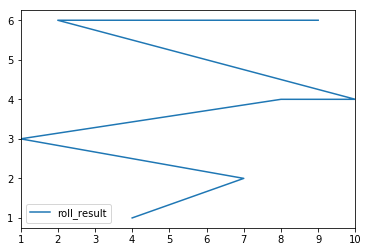

In [160]:
dice_results_bar= df_dice_results[["roll_result"]].plot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

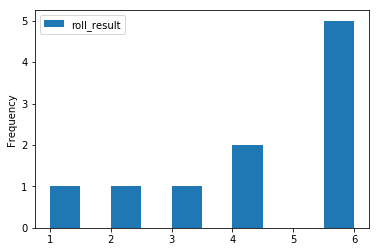

In [159]:
# your code here
dice_results_histogram = df_dice_results[["roll_result"]].plot(kind="hist")

In [161]:
"""
While a simple plot only shows which value was returend for each roll,
the frequency distribution (above presented in the hitogram), shows the frequency of each result
and thus gives a better overview.
"""

'\nWhile a simple plot only shows which value was returend for each roll,\nthe frequency distribution (above presented in the hitogram), shows the frequency of each result\nand thus gives a better overview.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [162]:
# your code here
def calc_mean(df):
    mean=(df.sum()/df.shape[0])
    return mean

calc_mean(df_dice_results)

roll_result    4.4
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [163]:
# your code here
df_dice_results = df_dice_results.reset_index()
df_dice_results.columns = ["roll_round", "roll_result"]
df_dice_results

,roll_round,roll_result
0,4,1
1,7,2
2,1,3
3,8,4
4,10,4
5,2,6
6,3,6
7,5,6
8,6,6
9,9,6


In [164]:
df_frequency_results = df_dice_results.groupby("roll_result").count()
df_frequency_results= df_frequency_results.apply(lambda x: x/df_frequency_results["roll_round"].sum()).reset_index()
df_frequency_results.columns = ["results", "frequency"]
df_frequency_results

,results,frequency
0,1,0.1
1,2,0.1
2,3,0.1
3,4,0.2
4,6,0.5


In [153]:
def calc_mean2(df):
    mean2 = sum(df["results"]*df["frequency"])
  return mean2
calc_mean2(df_frequency_results)

3.1

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [175]:
list_of_results=list(df_dice_results["roll_result"])
list_of_results

[1, 2, 3, 4, 4, 6, 6, 6, 6, 6]

In [178]:
def median(list_of_results):
    position = round(len(list_of_results)/2)
    if len(list_of_results)%2!=1:
        return (list_of_results[position-1] + list_of_results[position])/2 
    else:
        return list_of_results[position]

In [179]:
median(list_of_results)

5.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [186]:
def quantiles(list_of_results):
    i = round(len(list_of_results)/2)
    q1= median(list_of_results[:i-1])
    q2 = median(list_of_results)
    q3 = median(list_of_results[i+1:])
    return q1, q2, q3

In [187]:
quantiles(list_of_results)

(2.5, 5.0, 6.0)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

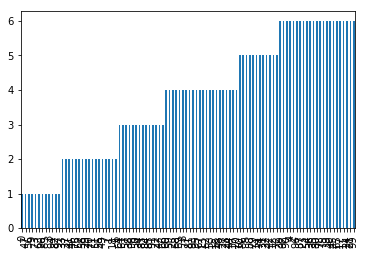

In [202]:
# your code here
df = pd.read_csv("../data/roll_the_dice_hundred.csv")
df = df[["roll", "value"]].sort_values("value")
bar= df["value"].plot(kind="bar")

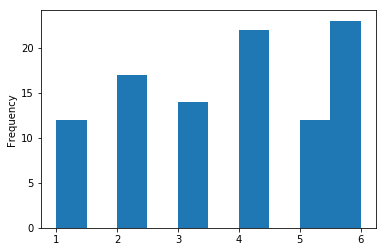

In [201]:

hist= df["value"].plot(kind="hist")

In [204]:
"""
I dont really now what to say?

It seems like some results were returned more often, but if do more rounds the difference should be less...
"""

'\nI dont really now what to say?\n\nIt seems like some results were returned more often, but if do more rounds the difference should be less...\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [206]:
# your code here
calc_mean(df[["value"]])

value    3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [211]:
# your code here
df_freq = df.groupby("value").count()
df_freq= df_freq.apply(lambda x: x/df_freq["roll"].sum()).reset_index()
df_freq.columns = ["results", "frequency"]
df_freq

,results,frequency
0,1,0.12
1,2,0.17
2,3,0.14
3,4,0.22
4,5,0.12
5,6,0.23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

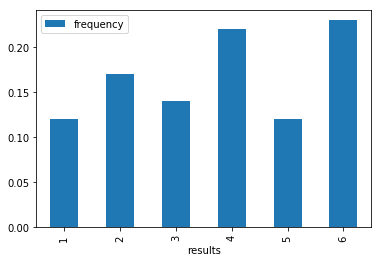

In [221]:
# your code here
df_freq.plot(x="results", y="frequency", kind="bar")


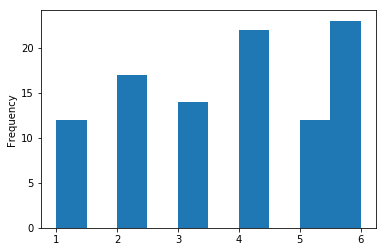

In [222]:
# alot easier at the beginning, just use and remind in mind the y axis by 100:
hist= df["value"].plot(kind="hist")

In [224]:
"""
same comments as in the exercvise before. 
plot of frequency or histogram helps to have a better overview of results
"""

'\nsame comments as in the exercvise before. \nplot of frequency or histogram helps to have a better overview of results\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

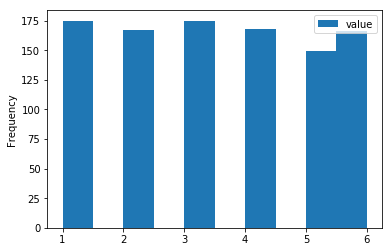

In [228]:
# your code here
df_new = pd.read_csv("../data/roll_the_dice_thousand.csv")
df_new[["value"]].plot(kind="hist")

In [ ]:
"""
The results are more evenly distributed as I would expect from a fair game

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

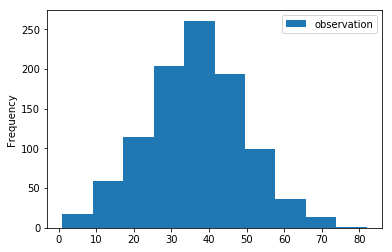

In [256]:
# your code here
df_ages = pd.read_csv("../data/ages_population.csv")
df_ages.plot(kind="hist")

In [257]:
df_ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [258]:
df_freq = df_ages.groupby("observation").count()
df_freq = df_freq.reset_index()
df_freq= df_freq.apply(lambda x: x/df_freq.shape[0]).reset_index()
df_freq.columns = ["results", "frequency"]
df_freq.sort_values("results")
df_freq.head()

,results,frequency
0,0,0.013889
1,1,0.027778
2,2,0.055556
3,3,0.069444
4,4,0.083333


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [259]:
# your code here
mean= df_ages.mean()
std= df_ages.std()
print(f"mean is:\n{mean},\n\nstandartdevation is:\n{std}")

mean is:
observation    36.56
dtype: float64,

standartdevation is:
observation    12.8165
dtype: float64


In [ ]:
"""
exactly as i guessed, you can clearly see it in the graph
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

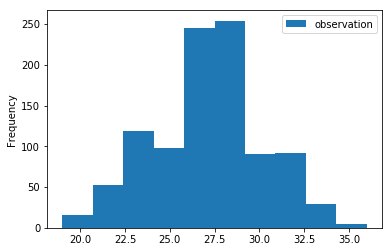

In [260]:
# your code here
df_ages2 = pd.read_csv("../data/ages_population2.csv")
df_ages2.plot(kind="hist")

In [261]:
df_freq = df_ages2.groupby("observation").count()
df_freq = df_freq.reset_index()
df_freq= df_freq.apply(lambda x: x/df_freq.shape[0]).reset_index()
df_freq.columns = ["results", "frequency"]
df_freq.sort_values("results")
df_freq.head()

,results,frequency
0,0,1.055556
1,1,1.111111
2,2,1.166667
3,3,1.222222
4,4,1.277778


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
It can be seen that it is as evenly distributed as the other one
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [262]:
# your code here
mean2=df_ages2.mean()
std2=df_ages2.std()
print(f"mean is:\n{mean2},\n\nstandartdevation is:\n{std2}")

mean is:
observation    27.155
dtype: float64,

standartdevation is:
observation    2.969814
dtype: float64


In [ ]:
"""
Even though the data on ages2.csv is not as evenly distributaed as the data in ages.csv, the distribution is not as wide
and kind of concentrated around the mean. which is why the standard deviation is much lower
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

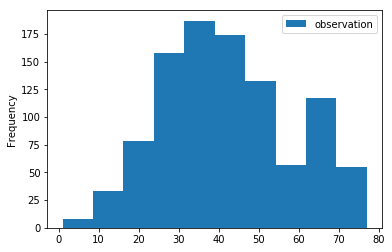

In [263]:
# your code here
df_ages3 = pd.read_csv("../data/ages_population3.csv")
df_ages3.plot(kind="hist")

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [264]:
# your code here
mean3=df_ages3.mean()
std3=df_ages3.std()
print(f"mean is:\n{mean3},\n\nstandartdevation is:\n{std3}")

mean is:
observation    41.989
dtype: float64,

standartdevation is:
observation    16.144706
dtype: float64


In [265]:
"""
There is clearly a negative skeweness (can be seen in the graph),
which is why the mean and the std is also higher than in the datasets before.

"""

'\nThere is clearly a negative skeweness (can be seen in the graph),\nwhich is why the mean and the std is also higher than in the datasets before.\n\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [266]:
# your code here
df_ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [267]:
"""
By definition the mean is smaller than the median when there is a negative skewness of the data.
as it can be seen the q3 is closer to median as the q2. 
this is typicall for negative skewness
"""

'\nBy definition the mean is smaller than the median when there is a left skewness of the data.\nas it can be seen the q3 is closer to median as the q2. \n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [270]:
# your code here
df_ages.quantile([0.005, 0.125, 0.25, 0.5, 0.75, 0.875, 0.995])

,observation
0.005,4.995
0.125,22.000
0.250,28.000
0.500,37.000
0.750,45.000
0.875,51.125
0.995,68.005


In [ ]:
"""
the negative skewness can seen more clearly now. most of the results are in the higher quantiles
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""